In [1]:
import time
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.compiler import transpile
#from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap, Layout
from qiskit.tools.jupyter import *
from qiskit.providers.jobstatus import JobStatus, JOB_FINAL_STATES
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [2]:
IBMQ.load_accounts()
IBMQ.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>]

In [3]:
backend = IBMQ.backends(name='ibmqx2')[0]
print("The backend is " + backend.name())
simulator = Aer.get_backend('qasm_simulator')

The backend is ibmqx2


In [4]:
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister(5, 'c')
qc = QuantumCircuit(qr, cr)
#qc.h(qr[0])
#qc.h(qr[1])
#qc.h(qr[2])
#qc.h(qr[3])
#qc.h(qr[4])
qc.measure(qr, cr)

#coupling_map = [[0, 1], [0, 2], [1, 2], [3, 2], [3, 4], [4, 2]]
#coupling_map = CouplingMap(couplinglist=coupling)
#layout = Layout({qr[i]: i for i in range(coupling_map.size())})
#layout = {('qr', 0): ('q', 0), ('qr', 1): ('q', 1), ('qr', 2): ('q', 2), ('qr', 3): ('q', 3), ('qr', 4): ('q', 4)}
layout = {0: qr[0], 1: qr[1], 2: qr[2], 3: qr[3], 4: qr[4]}

# IBMQx2

In [5]:
job_exp = execute(qc, backend=backend, initial_layout=layout, shots=8192)
counts = job_exp.result().get_counts(qc)

start_time = time.time()
job_status = job_exp.status()
while job_status not in JOB_FINAL_STATES:
    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'
          f' est. queue position: {job_exp.queue_position()}')
    time.sleep(10)
job_status = job_exp.status()

In [7]:
print(counts)

{'01010': 403, '10011': 38, '00011': 55, '11011': 29, '01001': 74, '01000': 1226, '00110': 2, '11010': 272, '10000': 1390, '11110': 1, '10001': 98, '01100': 4, '00000': 2239, '11001': 67, '01011': 32, '00010': 804, '11000': 786, '11100': 2, '00100': 5, '10111': 1, '00001': 151, '10110': 3, '10010': 506, '10100': 4}


In [19]:
qb = {}
qb1 = sum((v for k, v in counts.items() if k.endswith('0')), 0)
qb2 = sum((v for k, v in counts.items() if k.endswith('1')), 0)
qb3 = sum((v for k, v in counts.items() if k.endswith(('00' , '01'))), 0)
qb4 = sum((v for k, v in counts.items() if k.endswith(('10' , '11'))), 0)
qb5 = sum((v for k, v in counts.items() if k.endswith(('000' , '001' , '010' , '011'))), 0)
qb6 = sum((v for k, v in counts.items() if k.endswith(('100' , '101' , '110' , '111'))), 0)
qb7 = sum((v for k, v in counts.items() if k.startswith(('00' , '10'))), 0)
qb8 = sum((v for k, v in counts.items() if k.startswith(('01' , '11'))), 0)
qb9 = sum((v for k, v in counts.items() if k.startswith('0')), 0)
qb10 = sum((v for k, v in counts.items() if k.startswith('1')), 0)

qb.update([('qb00', qb1),
           ('qb01', qb2),
           ('qb10', qb3),
           ('qb11', qb4),
           ('qb20', qb5), 
           ('qb21', qb6),
           ('qb30', qb7), 
           ('qb31', qb8),
           ('qb40', qb9), 
           ('qb41', qb10)])

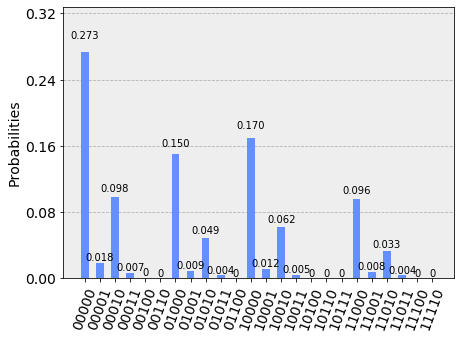

In [8]:
plot_histogram(counts) #raw data

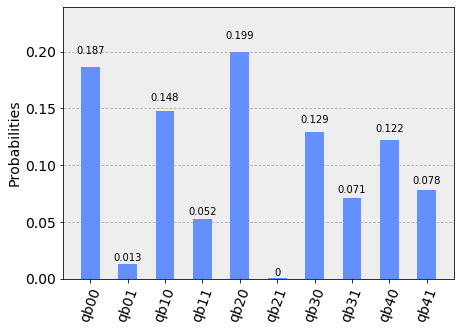

In [20]:
plot_histogram(qb)

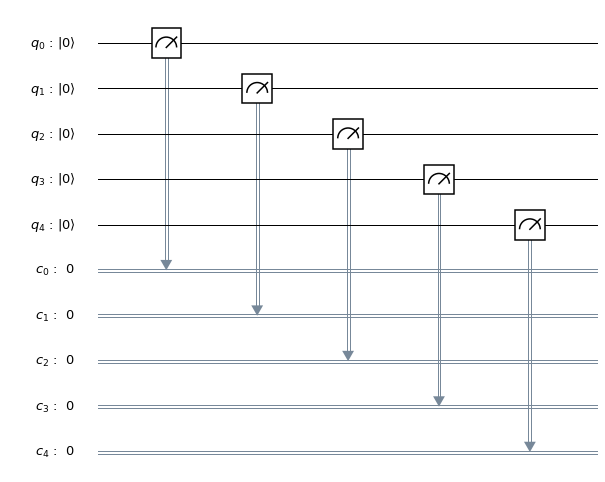

In [9]:
qc.draw(output='mpl')

# Simulation

In [13]:
job_sim = execute(qc, backend=simulator, shots=8192)
counts_sim = job_sim.result().get_counts(qc)

In [14]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'00000': 8192}


In [21]:
qbs = {}
qbs1 = sum((v for k, v in counts_sim.items() if k.endswith('0')), 0)
qbs2 = sum((v for k, v in counts_sim.items() if k.endswith('1')), 0)
qbs3 = sum((v for k, v in counts_sim.items() if k.endswith(('00' , '01'))), 0)
qbs4 = sum((v for k, v in counts_sim.items() if k.endswith(('10' , '11'))), 0)
qbs5 = sum((v for k, v in counts_sim.items() if k.endswith(('000' , '001' , '010' , '011'))), 0)
qbs6 = sum((v for k, v in counts_sim.items() if k.endswith(('100' , '101' , '110' , '111'))), 0)
qbs7 = sum((v for k, v in counts_sim.items() if k.startswith(('00' , '10'))), 0)
qbs8 = sum((v for k, v in counts_sim.items() if k.startswith(('01' , '11'))), 0)
qbs9 = sum((v for k, v in counts_sim.items() if k.startswith('0')), 0)
qbs10 = sum((v for k, v in counts_sim.items() if k.startswith('1')), 0)

qbs.update([('qb00', qbs1),
           ('qb01', qbs2),
           ('qb10', qbs3),
           ('qb11', qbs4),
           ('qb20', qbs5), 
           ('qb21', qbs6),
           ('qb30', qbs7), 
           ('qb31', qbs8),
           ('qb40', qbs9), 
           ('qb41', qbs10)])

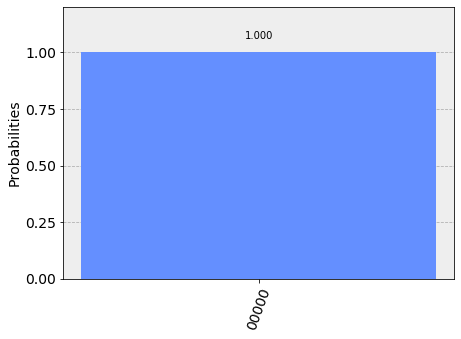

In [15]:
plot_histogram(counts_sim)

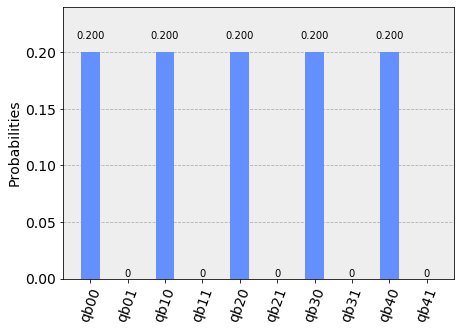

In [22]:
plot_histogram(qbs)